In [1]:
import pandas as pd

df = pd.read_csv('../data/global_weather.csv')

print("Shape:", df.shape)
df.head()

ModuleNotFoundError: No module named 'pandas'

In [2]:
pip install pandas 

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.3 MB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 346 kB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 507 kB 7.2 MB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 4.8 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

df = pd.read_csv('../data/global_weather.csv')
print("Shape:", df.shape)
df.head()

Shape: (60218, 41)


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [4]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [5]:
df['last_updated'] = pd.to_datetime(df['last_updated'])
df['last_updated'].head()

0   2024-05-16 13:15:00
1   2024-05-16 10:45:00
2   2024-05-16 09:45:00
3   2024-05-16 10:45:00
4   2024-05-16 09:45:00
Name: last_updated, dtype: datetime64[ns]

In [6]:
df = df.drop(columns=['last_updated_epoch', 'temperature_fahrenheit'])

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['temperature_celsius'])
plt.title("Temperature Outliers")
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

In [8]:
pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 8.5 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 9.2 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 107 kB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 13.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 10.3 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Matplotlib is building the font cache; this may take a moment.


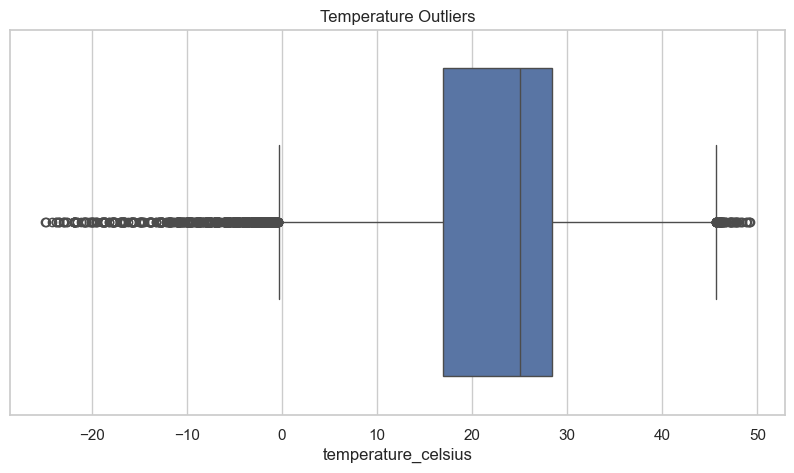

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['temperature_celsius'])
plt.title("Temperature Outliers")
plt.show()

In [10]:
Q1 = df['temperature_celsius'].quantile(0.25)
Q3 = df['temperature_celsius'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['temperature_celsius'] < lower_bound) | (df['temperature_celsius'] > upper_bound)]

print(f"Number of outlier rows: {len(outliers)}")
outliers[['country', 'location_name', 'temperature_celsius', 'last_updated']].head(10)


Number of outlier rows: 1350


,country,location_name,temperature_celsius,last_updated
784,Australia,Canberra,-1.0,2024-05-20 00:00:00
3205,Kuwait,Kuwait City,45.7,2024-05-31 17:15:00
4373,Kuwait,Kuwait City,45.9,2024-06-06 17:00:00
4568,Kuwait,Kuwait City,46.6,2024-06-07 17:00:00
5461,Australia,Canberra,-1.9,2024-06-13 00:15:00
5594,Qatar,Doha,46.2,2024-06-12 17:15:00
6313,Iraq,Baghdad,46.6,2024-06-16 16:45:00
6436,Australia,Canberra,-0.6,2024-06-18 00:00:00
6506,Iraq,Baghdad,46.7,2024-06-17 17:00:00
6516,Kuwait,Kuwait City,46.1,2024-06-17 17:00:00


In [11]:
df['is_temp_outlier'] = ((df['temperature_celsius'] < lower_bound) | 
                         (df['temperature_celsius'] > upper_bound)).astype(int)

df['is_temp_outlier'].value_counts()

is_temp_outlier
0    58868
1     1350
Name: count, dtype: int64

In [12]:
city_df = df[df['location_name'] == 'Kuwait City'].copy()


In [13]:
city_df = city_df.sort_values(by='last_updated')


In [14]:
city_df_daily = city_df.set_index('last_updated').resample('D').mean(numeric_only=True).reset_index()


In [15]:
city_df_daily[['last_updated', 'temperature_celsius']].head()


,last_updated,temperature_celsius
0,2024-05-16,29.7
1,2024-05-17,34.8
2,2024-05-18,36.1
3,2024-05-19,39.2
4,2024-05-20,37.6


In [16]:
pip install prophet


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 8.2 MB 3.0 MB/s eta 0:00:01     |██▎                             | 573 kB 3.0 MB/s eta 0:00:03
     |████████████████████████████████| 78 kB 8.7 MB/s eta 0:00:01
     |████████████████████████████████| 863 kB 10.4 MB/s eta 0:00:01
     |████████████████████████████████| 94 kB 9.2 MB/s  eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [17]:
from prophet import Prophet

/Users/samarthrajagopal/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [18]:
kuwait_df = city_df_daily[['last_updated', 'temperature_celsius']].rename(columns={
    'last_updated': 'ds',
    'temperature_celsius': 'y'
})

kuwait_df.head()

,ds,y
0,2024-05-16,29.7
1,2024-05-17,34.8
2,2024-05-18,36.1
3,2024-05-19,39.2
4,2024-05-20,37.6


In [19]:
model = Prophet()

In [20]:
model.fit(kuwait_df)

13:43:55 - cmdstanpy - INFO - Chain [1] start processing
13:43:55 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
future = model.make_future_dataframe(periods=30)

forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
336,2025-04-17,20.794102,16.830832,24.605469
337,2025-04-18,21.487474,17.787779,24.876685
338,2025-04-19,20.888349,17.224662,24.374672
339,2025-04-20,20.621549,16.937652,24.647994
340,2025-04-21,20.832877,17.029309,24.540455


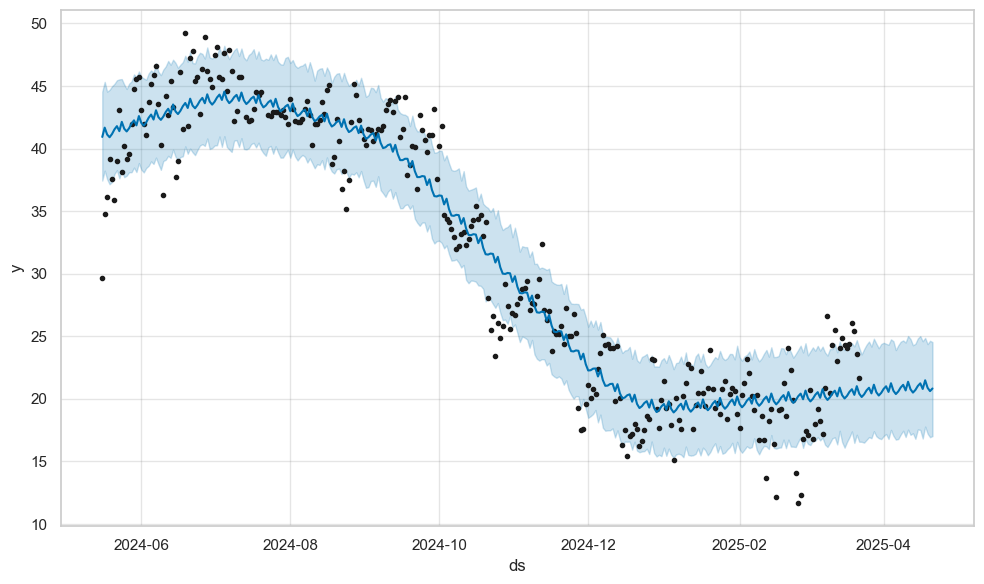

In [22]:
fig1 = model.plot(forecast)

In [23]:
xgb_df = df[df['location_name'] == 'Kuwait City'].copy()

In [24]:
xgb_df['last_updated'] = pd.to_datetime(xgb_df['last_updated'])

In [25]:
xgb_df = xgb_df.sort_values('last_updated')

In [26]:
xgb_df['year'] = xgb_df['last_updated'].dt.year
xgb_df['month'] = xgb_df['last_updated'].dt.month
xgb_df['day'] = xgb_df['last_updated'].dt.day
xgb_df['weekday'] = xgb_df['last_updated'].dt.weekday
xgb_df['hour'] = xgb_df['last_updated'].dt.hour

In [27]:
features = ['year', 'month', 'day', 'weekday', 'hour']
target = 'temperature_celsius'

X = xgb_df[features]
y = xgb_df[target]

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # time-aware
)

ModuleNotFoundError: No module named 'sklearn'

In [29]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.1 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 30.3 MB 9.3 MB/s eta 0:00:01     |█████████████████████████       | 23.7 MB 7.8 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 5.8 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [31]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.9 MB 2.8 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [32]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)

xgb_model.fit(X_train, y_train)


XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/samarthrajagopal/Library/Python/3.9/lib/python/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <89AD948E-E564-3266-867D-7AF89D6488F0> /Users/samarthrajagopal/Library/Python/3.9/lib/python/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]


In [33]:
from sklearn.metrics import mean_absolute_error

y_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'XGBoost MAE: {mae:.2f}')

NameError: name 'xgb_model' is not defined

In [34]:
brew install libomp

SyntaxError: invalid syntax (2760538136.py, line 1)